## Project : Predicting Delay in Airlines Dataset


### Table of Contents
- Introduction
- Data Wrangling
- Exploratory Data Analysis
- Predictions
- Conclusions

### Introduction



#### Dataset
539383 rows and 8 columns

        Airline: Name of Airline
        Flight: Flight number
        AirportFrom: Airport the Plane took off from
        AirportTo: Destination Airport
        DayOfWeek: The Day of thee week the Flight was made
        Time: The duration of the flight
        Lenght: The distance the flight traveled
        Delay: If the flight was delayed or not
        
       

In [1]:
#Load useful libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#load the data
airline_df = pd.read_csv('Airlines.csv')

In [3]:
#view the top 5
airline_df.head()

id Airline  Flight AirportFrom AirportTo  DayOfWeek  Time  Length  Delay
0   1      CO     269         SFO       IAH          3    15     205      1
1   2      US    1558         PHX       CLT          3    15     222      1
2   3      AA    2400         LAX       DFW          3    20     165      1
3   4      AA    2466         SFO       DFW          3    20     195      1
4   5      AS     108         ANC       SEA          3    30     202      0

In [4]:
#check the shape, summary statistics and general summary of the data
airline_df.shape

(539383, 9)

In [5]:
#Checking the general summary of the data
airline_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539383 entries, 0 to 539382
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           539383 non-null  int64 
 1   Airline      539383 non-null  object
 2   Flight       539383 non-null  int64 
 3   AirportFrom  539383 non-null  object
 4   AirportTo    539383 non-null  object
 5   DayOfWeek    539383 non-null  int64 
 6   Time         539383 non-null  int64 
 7   Length       539383 non-null  int64 
 8   Delay        539383 non-null  int64 
dtypes: int64(6), object(3)
memory usage: 37.0+ MB


In [6]:
#checking the summary statistics
airline_df.describe()

id         Flight      DayOfWeek           Time  \
count  539383.00000  539383.000000  539383.000000  539383.000000   
mean   269692.00000    2427.928630       3.929668     802.728963   
std    155706.60446    2067.429837       1.914664     278.045911   
min         1.00000       1.000000       1.000000      10.000000   
25%    134846.50000     712.000000       2.000000     565.000000   
50%    269692.00000    1809.000000       4.000000     795.000000   
75%    404537.50000    3745.000000       5.000000    1035.000000   
max    539383.00000    7814.000000       7.000000    1439.000000   

              Length          Delay  
count  539383.000000  539383.000000  
mean      132.202007       0.445442  
std        70.117016       0.497015  
min         0.000000       0.000000  
25%        81.000000       0.000000  
50%       115.000000       0.000000  
75%       162.000000       1.000000  
max       655.000000       1.000000

In [7]:
#check for missing values
airline_df.isnull().sum()

id             0
Airline        0
Flight         0
AirportFrom    0
AirportTo      0
DayOfWeek      0
Time           0
Length         0
Delay          0
dtype: int64

In [8]:
#check for duplicates
airline_df.duplicated().sum()

0

In [9]:
#check the datatype
airline_df.dtypes

id              int64
Airline        object
Flight          int64
AirportFrom    object
AirportTo      object
DayOfWeek       int64
Time            int64
Length          int64
Delay           int64
dtype: object

In [10]:
#drop id column
airline_df = airline_df.drop(['id'], axis=1)

In [11]:
#confirm to see if change occurred 
airline_df

Airline  Flight AirportFrom AirportTo  DayOfWeek  Time  Length  Delay
0           CO     269         SFO       IAH          3    15     205      1
1           US    1558         PHX       CLT          3    15     222      1
2           AA    2400         LAX       DFW          3    20     165      1
3           AA    2466         SFO       DFW          3    20     195      1
4           AS     108         ANC       SEA          3    30     202      0
...        ...     ...         ...       ...        ...   ...     ...    ...
539378      CO     178         OGG       SNA          5  1439     326      0
539379      FL     398         SEA       ATL          5  1439     305      0
539380      FL     609         SFO       MKE          5  1439     255      0
539381      UA      78         HNL       SFO          5  1439     313      1
539382      US    1442         LAX       PHL          5  1439     301      1

[539383 rows x 8 columns]

In [12]:
#view the unique values of day of the week
airline_df['DayOfWeek'].unique()

array([3, 4, 5, 6, 7, 1, 2], dtype=int64)

In [13]:
#check unique airline names
airline_df['Airline'].unique()

array(['CO', 'US', 'AA', 'AS', 'DL', 'B6', 'HA', 'OO', '9E', 'OH', 'EV',
       'XE', 'YV', 'UA', 'MQ', 'FL', 'F9', 'WN'], dtype=object)

In [14]:
airline_df['Airline'].nunique()

18

In [15]:
airline_df['AirportFrom'].nunique()

293

In [16]:
airline_df['AirportTo'].nunique()

293

### Brief conclusion of above analysis
The dataset appears to be clean, no missing values, no duplicates, the data types are also correct and the total amount of data is enough for prediction

ID column was dropped because it won't be useful in this analysis

Checking the unique values of Day of the week, it starts from 1 meaning the day of the week starts from Monday.



Next I will visualize some parts of the data to check correlation

In [17]:
#which airline has been used the most
a = airline_df['Airline'].value_counts()
a

WN    94097
DL    60940
OO    50254
AA    45656
MQ    36605
US    34500
XE    31126
EV    27983
UA    27619
CO    21118
FL    20827
9E    20686
B6    18112
YV    13725
OH    12630
AS    11471
F9     6456
HA     5578
Name: Airline, dtype: int64

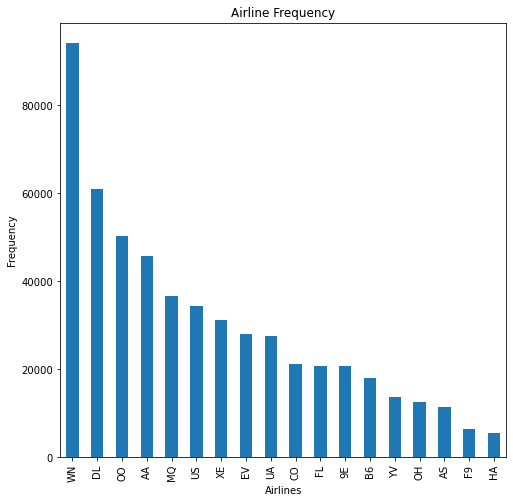

In [18]:
#plot a bar chart to display the most frequent airline
a.plot(kind='bar', figsize=(8,8))
plt.xlabel('Airlines')
plt.ylabel('Frequency')
plt.title('Airline Frequency');

The above chart shows that WN is the most frequent Airplane used


In [19]:
#Day of the week that had most flights
most_days = airline_df['DayOfWeek'].value_counts()
most_days

4    91445
3    89746
5    85248
1    72769
2    71340
7    69879
6    58956
Name: DayOfWeek, dtype: int64

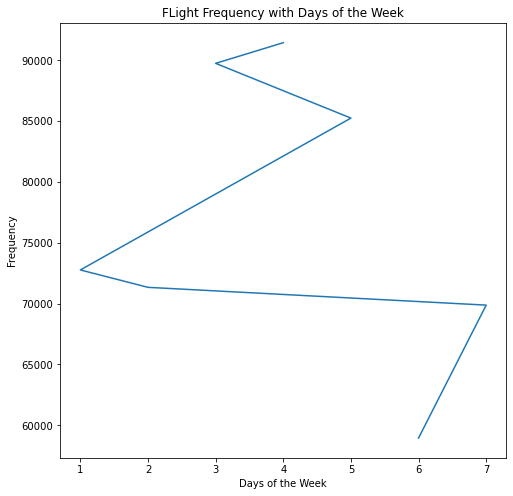

In [20]:
#visualize the day that had most flights in a plot
most_days.plot(kind='line', figsize=(8,8))
plt.xlabel('Days of the Week')
plt.ylabel('Frequency')
plt.title('FLight Frequency with Days of the Week');

The above plot shows that Thursdays(4) have had the highest flights of 91445, followed by Wednesdays with 89746 flights

In [21]:
#Find the airline with the highest count, then check the airports it took off from and landed in

#Filter the dataframe to only give information on the most frequently used airline 
#Most frequently used airline is WN
airline_wn = airline_df.query('Airline == "WN"')
#Filer further to know the airports ir took off from and landed in
airline_wn[['Airline', 'AirportFrom', 'AirportTo']].value_counts().head()

Airline  AirportFrom  AirportTo
WN       DAL          HOU          701
         HOU          DAL          698
         LAX          OAK          406
         PHX          LAS          406
         OAK          LAX          405
dtype: int64

In [22]:
#Find how many times WN experienced delay
airline_wn[['Airline', 'Delay']].value_counts()

Airline  Delay
WN       1        65657
         0        28440
dtype: int64

The most frequently used airline had a lot of delays; 65657 delays in total
Now let's plot it

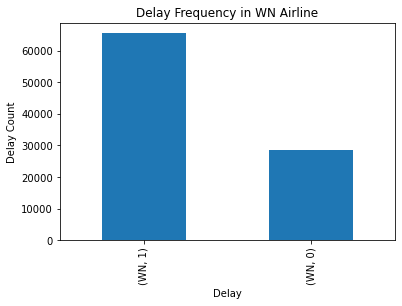

In [23]:
airline_wn[['Airline', 'Delay']].value_counts().plot(kind='bar')
plt.xlabel('Delay')
plt.ylabel('Delay Count')
plt.title('Delay Frequency in WN Airline');

Now let's look at relationships between features and delays


### Check the Airlines with the most and least delay 

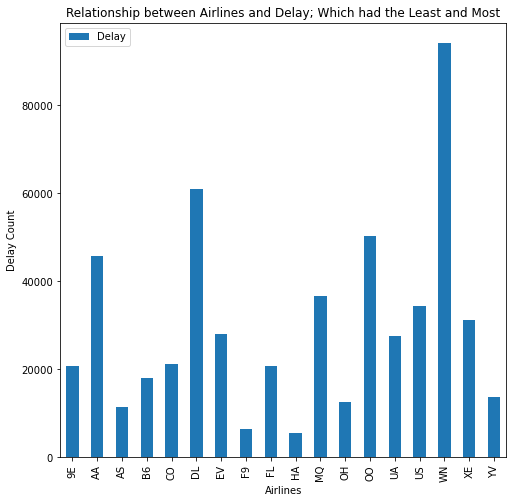

In [24]:
airline_delay = airline_df[['Airline', 'Delay']].groupby('Airline').count()

airline_delay.plot(kind='bar', figsize=(8,8))
plt.title('Relationship between Airlines and Delay; Which had the Least and Most')
plt.xlabel('Airlines')
plt.ylabel('Delay Count');

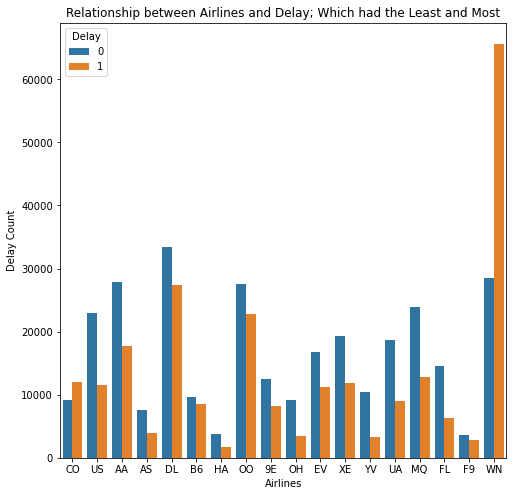

In [25]:
#For better visualization, a countplot will be used
fig = plt.figure(figsize=(8,8))
sns.countplot(data=airline_df, x='Airline', hue='Delay')
plt.title('Relationship between Airlines and Delay; Which had the Least and Most')
plt.xlabel('Airlines')
plt.ylabel('Delay Count');

WN airline had the most delays while HA airline had the least amount of delays

This may suggest that WN airlines have a higher chance of getting delayed

### Which Day of the week experinced the most delays, least delays and the day of the week that had the highest number of no delays

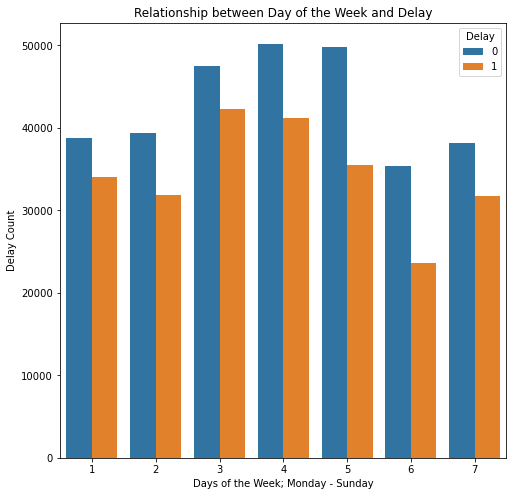

In [26]:
# Using a seaborn countplot will be better for visualization
fig = plt.figure(figsize=(8,8))
sns.countplot(data=airline_df, x='DayOfWeek', hue='Delay')
plt.title('Relationship between Day of the Week and Delay')
plt.xlabel('Days of the Week; Monday - Sunday')
plt.ylabel('Delay Count');

### Summary
Wednesdays had the highest amount of Delays
Saturdays had the least amount of Delays

Thursdays had the highest amount of no delays

### Do longer flights experience delay

Looking at the relationship between time the flight takes and delay

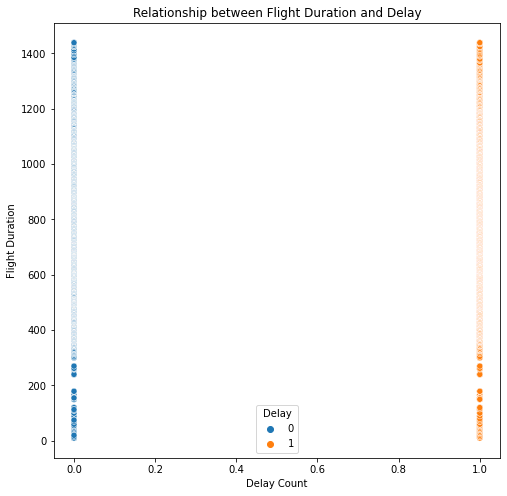

In [27]:
#creating a scatterplot to display he relationship between flight duration and Delay
fig = plt.figure(figsize=(8,8))
sns.scatterplot(data=airline_df, x='Delay', y='Time', hue='Delay')
plt.title('Relationship between Flight Duration and Delay')
plt.xlabel('Delay Count')
plt.ylabel('Flight Duration');

From the above plot, longer flight durations does not determine if the flight will be delayed or not.

In [28]:
airline_df.head()

Airline  Flight AirportFrom AirportTo  DayOfWeek  Time  Length  Delay
0      CO     269         SFO       IAH          3    15     205      1
1      US    1558         PHX       CLT          3    15     222      1
2      AA    2400         LAX       DFW          3    20     165      1
3      AA    2466         SFO       DFW          3    20     195      1
4      AS     108         ANC       SEA          3    30     202      0

### Relationship between time and distance

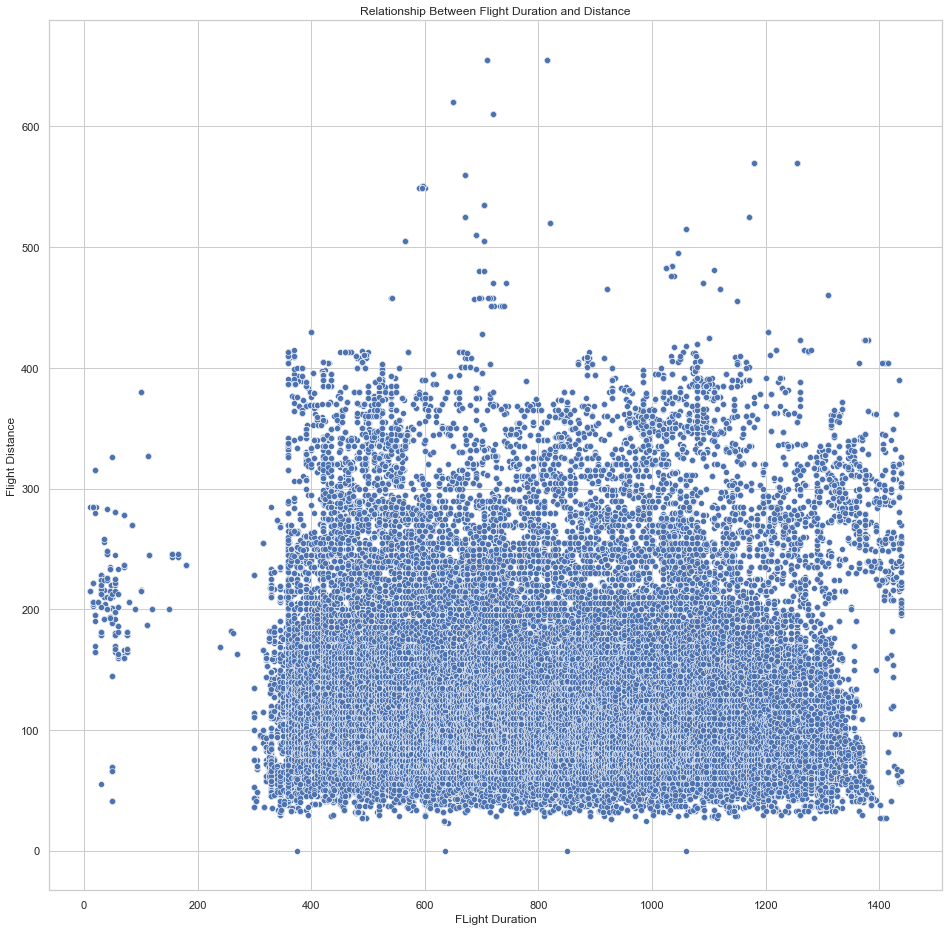

In [29]:
#Before performing any analysis on time and distance let's plot a scatter plot to find correlation
#set the plot style and figsize
plt.figure(figsize=(16,16))
sns.set(style='whitegrid')
sns.scatterplot(x='Time', y='Length', data=airline_df)
plt.xlabel('FLight Duration')
plt.ylabel('Flight Distance')
plt.title('Relationship Between Flight Duration and Distance');

In [30]:
#use corr() to further decide if there is correlation between the two
airline_df[['Time', 'Length']].corr()

Time    Length
Time    1.000000 -0.020612
Length -0.020612  1.000000

The scatter plot above shows that there is no correlation between time and distance. 

Using .corr(), it shows that they both have a negative correlation which is very low. It is safe to say there is no correlation between time and length

Flights can travel long distances at the same duration with short distances

Most flights have a duration between 300-1400 minuites


## Prediction


### Data Preprocessing

In [31]:
# Display the datafframe
airline_df.head()

Airline  Flight AirportFrom AirportTo  DayOfWeek  Time  Length  Delay
0      CO     269         SFO       IAH          3    15     205      1
1      US    1558         PHX       CLT          3    15     222      1
2      AA    2400         LAX       DFW          3    20     165      1
3      AA    2466         SFO       DFW          3    20     195      1
4      AS     108         ANC       SEA          3    30     202      0

In [32]:
#creating a copy of the data
new_airline = airline_df.copy()

In [33]:
#Using OneHot Encoding on the Airlines column
airline_enc = pd.get_dummies(new_airline['Airline'])
airline_enc.head()

9E  AA  AS  B6  CO  DL  EV  F9  FL  HA  MQ  OH  OO  UA  US  WN  XE  YV
0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0
1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0
2   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
3   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
4   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0

In [34]:
#combine the encoded airline column to the original dataframe using concat
new_airline = pd.concat([new_airline, airline_enc], axis=1)
new_airline.head()

Airline  Flight AirportFrom AirportTo  DayOfWeek  Time  Length  Delay  9E  \
0      CO     269         SFO       IAH          3    15     205      1   0   
1      US    1558         PHX       CLT          3    15     222      1   0   
2      AA    2400         LAX       DFW          3    20     165      1   0   
3      AA    2466         SFO       DFW          3    20     195      1   0   
4      AS     108         ANC       SEA          3    30     202      0   0   

   AA  ...  FL  HA  MQ  OH  OO  UA  US  WN  XE  YV  
0   0  ...   0   0   0   0   0   0   0   0   0   0  
1   0  ...   0   0   0   0   0   0   1   0   0   0  
2   1  ...   0   0   0   0   0   0   0   0   0   0  
3   1  ...   0   0   0   0   0   0   0   0   0   0  
4   0  ...   0   0   0   0   0   0   0   0   0   0  

[5 rows x 26 columns]

In [35]:
#scaling
x1 = new_airline[['Flight', 'Time', 'Length', 'DayOfWeek']]

In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x1_scaled = pd.DataFrame(scaler.fit_transform(x1), columns=x1.columns)

In [37]:
x1_scaled.head()

Flight      Time    Length  DayOfWeek
0 -1.044258 -2.833092  1.038237  -0.485552
1 -0.420778 -2.833092  1.280689  -0.485552
2 -0.013509 -2.815110  0.467761  -0.485552
3  0.018415 -2.815110  0.895618  -0.485552
4 -1.122133 -2.779144  0.995451  -0.485552

In [38]:
x1_scaled.var()

Flight       1.000002
Time         1.000002
Length       1.000002
DayOfWeek    1.000002
dtype: float64

In [39]:
x2 = new_airline.drop(['Airline', 'AirportFrom', 'AirportTo', 'Flight', 'Time', 'Length', 'Delay', 'DayOfWeek'], axis=1)

In [40]:
x2.head()

9E  AA  AS  B6  CO  DL  EV  F9  FL  HA  MQ  OH  OO  UA  US  WN  XE  YV
0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0
1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0
2   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
3   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
4   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0

In [41]:
X = pd.concat([x1_scaled, x2], axis=1)
y = new_airline['Delay']

In [42]:
X.head()

Flight      Time    Length  DayOfWeek  9E  AA  AS  B6  CO  DL  ...  FL  \
0 -1.044258 -2.833092  1.038237  -0.485552   0   0   0   0   1   0  ...   0   
1 -0.420778 -2.833092  1.280689  -0.485552   0   0   0   0   0   0  ...   0   
2 -0.013509 -2.815110  0.467761  -0.485552   0   1   0   0   0   0  ...   0   
3  0.018415 -2.815110  0.895618  -0.485552   0   1   0   0   0   0  ...   0   
4 -1.122133 -2.779144  0.995451  -0.485552   0   0   1   0   0   0  ...   0   

   HA  MQ  OH  OO  UA  US  WN  XE  YV  
0   0   0   0   0   0   0   0   0   0  
1   0   0   0   0   0   1   0   0   0  
2   0   0   0   0   0   0   0   0   0  
3   0   0   0   0   0   0   0   0   0  
4   0   0   0   0   0   0   0   0   0  

[5 rows x 22 columns]

In [43]:
y.head()

0    1
1    1
2    1
3    1
4    0
Name: Delay, dtype: int64

## Building the Model

The delay column is the target variable so logistic regression will be used

In [44]:
#import necessary models and tools for prediction
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score


rfc = RandomForestClassifier(n_estimators=100)
pca = PCA(n_components=0.90)

In [45]:
#split the data using train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, shuffle = True, random_state = 8)

In [46]:
#split the test sets further to create a seperate test set that will not be touched till the model is properly built
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test,
    test_size=0.5, random_state= 8)

In [47]:
x_pc = pca.fit_transform(X_train)
x_pc

array([[-1.07283259, -0.32031841, -1.51285244, ..., -0.13269269,
        -0.35881214, -0.47755449],
       [ 1.05493574,  0.22834898,  1.30301622, ..., -0.47486525,
         0.71514272, -0.22257843],
       [-0.11407404,  0.64038003,  0.70590467, ..., -0.21264282,
        -0.33291234,  0.30656831],
       ...,
       [-0.52965993, -1.76271385, -0.59253445, ..., -0.12798912,
        -0.38985114, -0.49562468],
       [ 0.43873221,  1.03735547, -0.07863245, ...,  0.78757815,
         0.16519435,  0.00609799],
       [-0.57689454, -0.15405488, -0.40219262, ..., -0.05651658,
        -0.1063916 , -0.13968439]])

In [48]:
pca.explained_variance_ratio_

array([0.28128347, 0.20385624, 0.20370933, 0.13911058, 0.02919926,
       0.02107604, 0.01569209, 0.01525977])

In [49]:
x_test_pca = pca.transform(X_test)

In [50]:
rfc.fit(x_pc,y_train)

RandomForestClassifier()

In [51]:
y_pred = rfc.predict(x_test_pca)

In [52]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.6168888954807706


In [53]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [54]:
%%time

params = {'n_estimators' : [100],
          'criterion' : ['entropy'],
          'max_depth' : list(range(2, 20, 1)),
          'max_features' : ['auto', 'sqrt']}
# Train the grid search model
gscv = GridSearchCV(estimator = RandomForestClassifier(), 
                  param_grid = params, 
                  cv=5,
                  n_jobs=-1, 
                  scoring='accuracy')

CPU times: total: 0 ns
Wall time: 500 ms


In [ ]:
%%time
model = gscv.fit(x_pc, y_train)

In [ ]:
model.best_estimator_.get_params()